# Image Processing and Preparation for Deep Learning

## Manipulate and transform images at will
![](images/unsplash.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by
        <a href='https://unsplash.com/@pkprasad1996?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Prasad Panchakshari</a>
        on
        <a href='https://unsplash.com/s/photos/kitten?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Unsplash</a>
    </strong>
</figcaption>

Image data is probably the most common after text.

It uses a grid of small square units called pixels. A pixel covers a small area and has a value that represents a color. The more pixels in an image, the higher its quality and more memory it takes to store.
Image processing is mostly about manipulating these individual pixels (or sometimes groups of them) so that computer vision algorithms can extract more information from them.

## Library Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage
from skimage.filters import try_all_threshold

import warnings
warnings.filterwarnings("ignore")

## Global Functions used throughout this notebook

In [8]:
'''
A function to display np.ndarrays as images
'''

def show(img: np.ndarray, title="Image", cmap_type="gray", axis=False):
    """
    A function to display np.ndarrays as images
    """
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    if not axis:
        plt.axis("off")
    plt.margins(0, 0)
    plt.show();

In [9]:
'''
Function to compare images
'''

def compare(original, filtered, title_filtered='filtered', cmap_type='gray', axis=False, title_original='original'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

    ax1.imshow(original, cmap=cmap_type)
    ax1.set_title(title_original)

    ax2.imshow(filtered, cmap=cmap_type)
    ax2.set_title(title_filtered)

    if not axis:
        ax1.axis('off')
        ax2.axis('off')

    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0.01)
    plt.margins(0, 0)
    plt.show()

## Image basics with NumPy and Scikit-image

Images are loaded as NumPy ndarrays in both Matplotlib and Skimage.

In [10]:
from skimage.io import imread

image = imread("images/colorful_scenery.jpg")

print(f"The type of image is - {type(image)}")

The type of image is - <class 'numpy.ndarray'>


In [11]:
# We can use ndarrays to retrieve general information from images
print(f"Shape of the image - {image.shape}")
print(f"Number of Dimensions of the image - {image.ndim}")
print(f"Total Number of pixels - {image.size}")

Shape of the image - (853, 1280, 3)
Number of Dimensions of the image - 3
Total Number of pixels - 3275520


Our hidden image is 853 pixels in height and 1280 in width. The third dimension denotes the value of the RGB (red, green, blue) color channel. The most common images formats are in 3D

We can retrieve individual pixel values via regular NumPy indexing. Below, we try to index the image to retrieve each of the three color channels

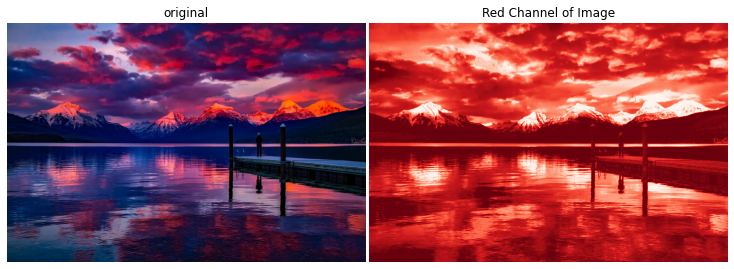

In [12]:
red = image[:, :, 0]
compare(image, red, 'Red Channel of Image', cmap_type='Reds_r')

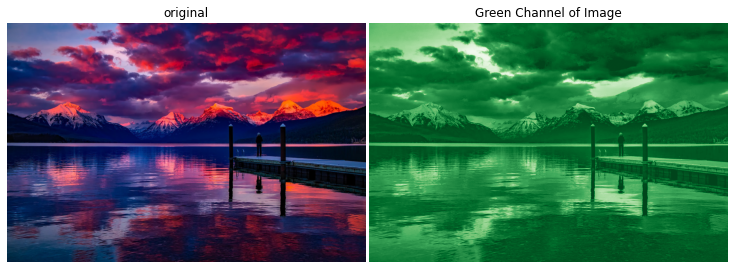

In [13]:
red = image[:, :, 1]
compare(image, red, 'Green Channel of Image', cmap_type='Greens_r')

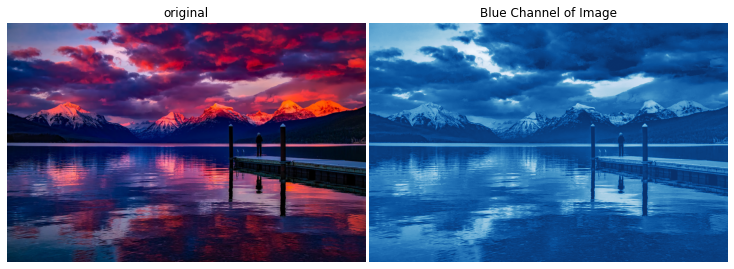

In [14]:
blue = image[:, :, 0]
compare(image, red, 'Blue Channel of Image', cmap_type='Blues_r')

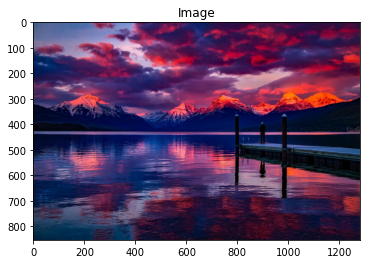

In [15]:
# Images are unlike the usual Matplotlib plots. Their origin isn't located in the bottom left, but at the position (0, 0), the top left.
show(image, axis=True)

## Common Transformations

The most common image transformation we will be performing is converting color images to grayscale. Many image processing algorithms require grayscale, 2D arrays because color isn't the defining feature of images and computer can already extract enough information without it.


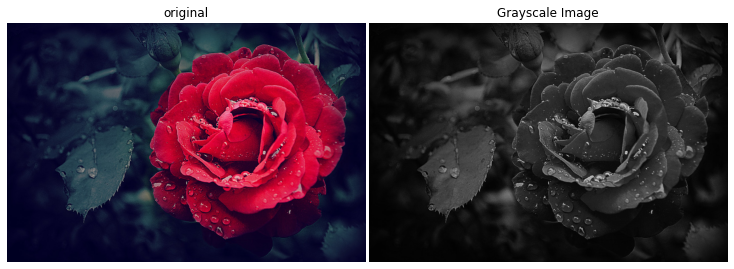

In [16]:
from skimage.color import rgb2gray

image = imread('images/grayscale_example.jpg')

# convert image to grayscale
gray = rgb2gray(image)

compare(image, gray, 'Grayscale Image')

In [17]:
print(f"The shape of the image - {image.shape}")

The shape of the image - (853, 1280, 3)


When we convert images to grayscale, they lose their 3rd dimension - the color channel. Instead, each cell in the image array now represents an integer in `uint8` type. They range from 0 to 255, giving 256 shades of gray.
You can also use NumPy functions like [`np.flipud`](https://numpy.org/doc/stable/reference/generated/numpy.flipud.html) or [`np.fliplr`](https://numpy.org/doc/stable/reference/generated/numpy.fliplr.html#numpy.fliplr) at your heart's desire to manipulate images in any way a NumPy array can be manipulated.


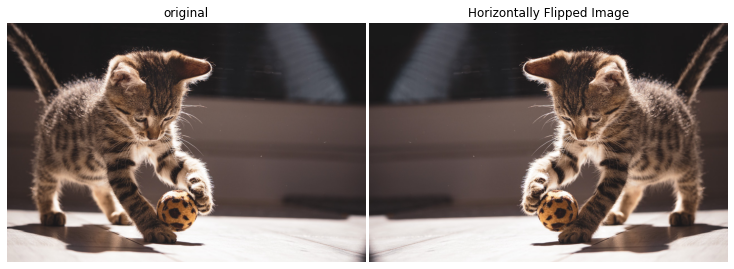

In [18]:
kitten = imread('images/horizontal_flip.jpg')
horizontal_flipped = np.fliplr(kitten)

compare(kitten, horizontal_flipped, "Horizontally Flipped Image")

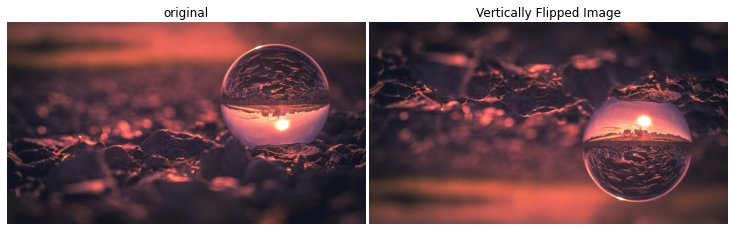

In [19]:
ball = imread('images/upside_down.jpg')
vertically_flipped = np.flipud(ball)

compare(ball, vertically_flipped, "Vertically Flipped Image")

## Histogram of Color Channels
Sometimes, it is useful to look at the intensity of each color channel to get a feel of the color distributions. We can do so by slicing each color channel and plotting their histograms. Here is a function to perform this operation:


In [20]:
def plot_with_hist_channel(img, channel):
    channels = ['red', 'green', 'blue']
    channels_idx = channels.index(channel)
    color = channels[channels_idx]

    extracted_channel = img[:, :, channels_idx]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
    ax1.imshow(img)
    ax1.axis('off')
    ax2.hist(extracted_channel.ravel(), bins=256, color=color)
    ax2.set_title(f"{channels[channels_idx]} histogram")

Apart from the few Matplotlib details, you should pay attention to the call of the hist function. Once we extract the color channel and its array, we flatten it into 1D array and then pass it to the hist function. The number of bins should be 256, one for every pixel value - 0 being pitch black and 255 being fully white.

Let's use the function for our colorful scenery image:


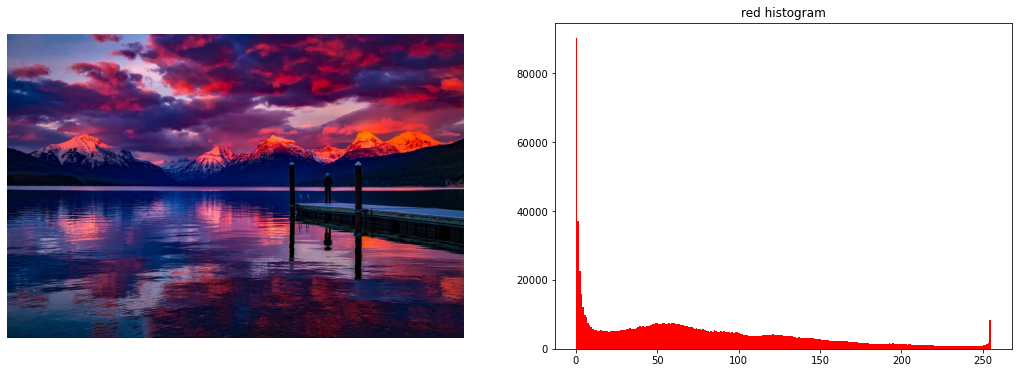

In [21]:
colorful_scenery = imread('images/colorful_scenery.jpg')
plot_with_hist_channel(colorful_scenery, 'red')

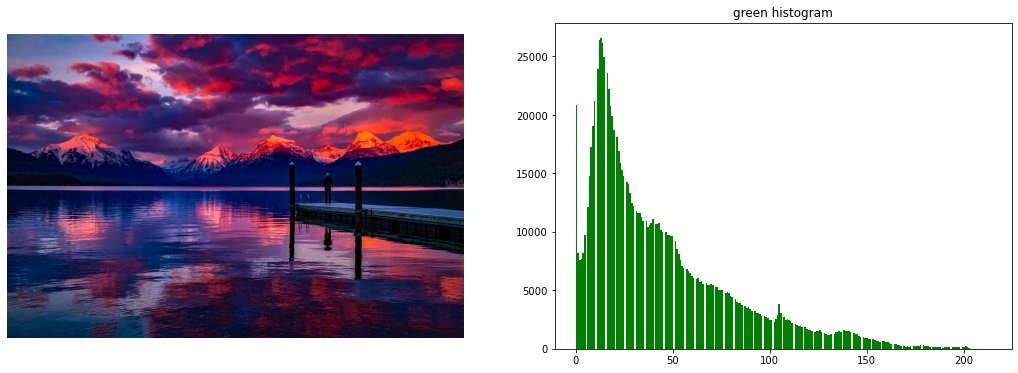

In [22]:
plot_with_hist_channel(colorful_scenery, 'green')

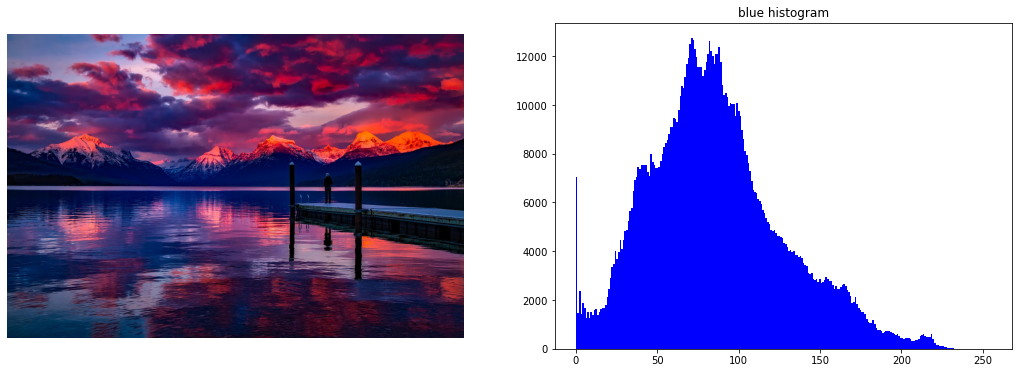

In [23]:
plot_with_hist_channel(colorful_scenery, 'blue')

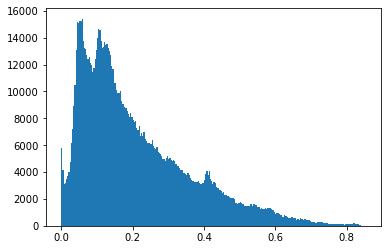

In [24]:
# We can also use histograms to find out the lightness in the image after converting it to a grayscale

gray_color_scenery = rgb2gray(colorful_scenery)
plt.hist(gray_color_scenery.ravel(), bins=256);

Most pixels have lower values as the scenery image is a bit darker.

## Filters

### 1. Manual Thresholding
Now, we arrive at the fun stuff - filtering images. The first operation we will learn is thresholding. Let's load an example image:

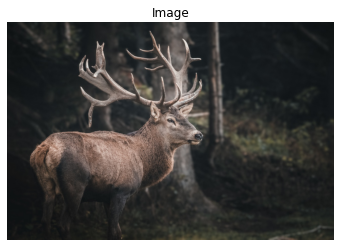

In [25]:
stag = imread('images/binary_example.jpg')
show(stag) # Show the image

Thresholding has many applications in image segmentation, object detection, finding edges or contours, etc. It is mostly used to differentiate the background and foreground of an image.

Thresholding works best on high contrast grayscale images, so we will convert the stag image:

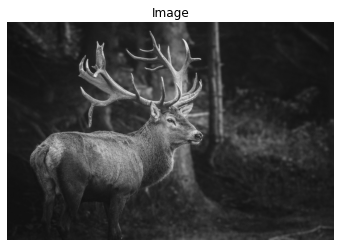

In [26]:
# Convert to grayscale
stag_gray = rgb2gray(stag)
show(stag_gray)

We will start with basic manual thresholding and move on to automatic.

First, we look at the mean value of all pixels in the gray image:

In [27]:
# mean value of all pixels
stag_gray.mean()

0.20056063095037996

> Note that the above gray image's pixels are normalized between 0 and 1 by dividing all their values by 256.

We obtain a mean of 0.2 which gives us a preliminary idea for the threshold we might want to use.

Now, we use this threshold to mask the image array. If the pixel value is lower than the threshold, its value becomes 0 - black or 1 - white if otherwise. In other words, we get a black and white, binary picture:

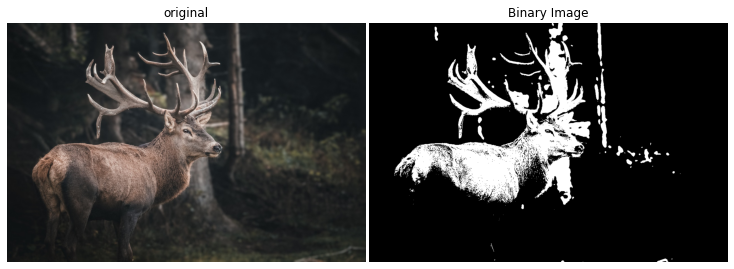

In [28]:
# Set the threshold
threshold = 0.35

# Binarize the image
binary_image = stag_gray > threshold
compare(stag, binary_image, "Binary Image")

In this version, we can differentiate the outline of the stag more clearly. We can reverse the mask so that the background turns white:

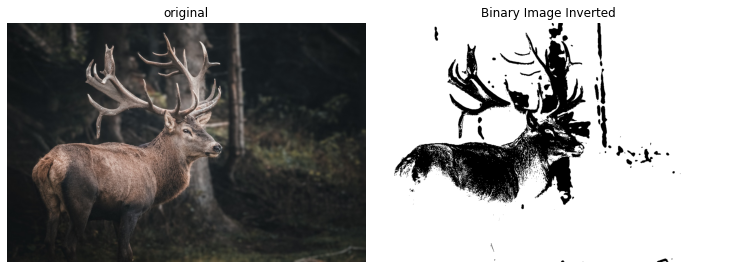

In [29]:
inverted_binary = stag_gray <= threshold
compare(stag, inverted_binary, 'Binary Image Inverted')

### 2. Thresholding - global

While it might be fun try out different thresholds and seeing their effect on the image, we usually perform thresholding by using an algorithm, which we will be more robust than our eyeball estimates.

There are many thresholding algorithms, so it might be hard to choose one. In this case, skimage has try_all_threshold function which runs 7 thresholding algorithms on the given grayscale image. Let's load an example and convert it:


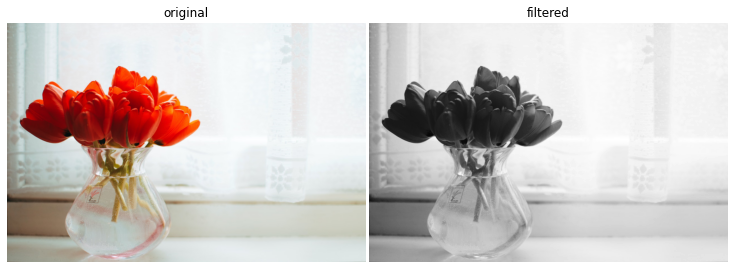

In [30]:
flower = imread('images/global_threshold_ex.jpg')
# Apply the threshold algorithm
flower_gray = rgb2gray(flower)
compare(flower, flower_gray)

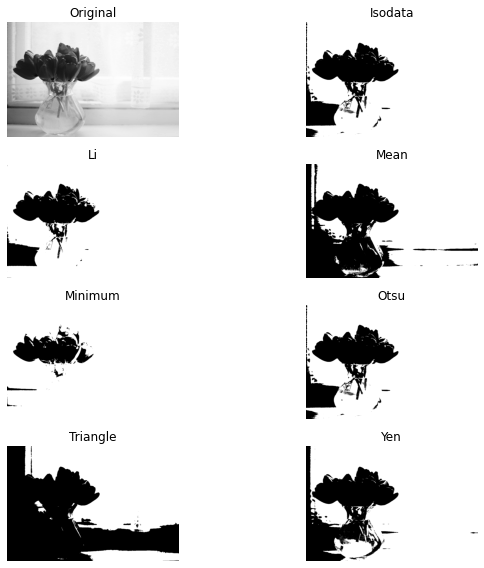

In [31]:
# We will see if we can refine the features of the tulip by applying thresholding
fig, ax = try_all_threshold(flower_gray, figsize=(10, 8), verbose=False)

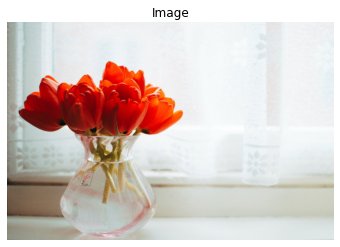

In [32]:
show(flower)

The image has an uneven background because there is so much light coming from the window behind. We can confirm this by plotting a histogram of the gray tulip:

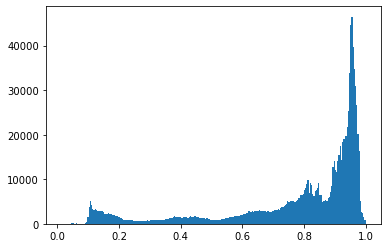

In [33]:
plt.hist(flower_gray.ravel(), bins=256);

As expected, most pixels values are at the far end of the histogram, confirming that they are mostly bright.

Why is this important? Depending on the lightness of an image, the performance of thresholding algorithms also changes. For this reason, thresholding algorithms are divided into two types:

1. Global - for images with even, uniform backgrounds
2. Local - for images with different levels of brightness in different regions of the image.

The tulip image goes into the second category because the right part of the image is much brighter than the other half, making its background uneven. We can't use a global thresholding algorithm on it and which was the reason why the performance of all algorithms in try_all_threshold was so poor.

We will come back to the tulip example and local thresholding in just a bit. For now, we will load another examples with a much refined brightness and try to automatically threshold it:


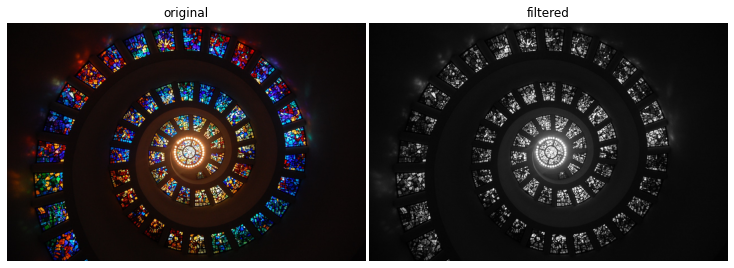

In [34]:
spiral = imread('images/otsu_example.jpg')
spiral_gray = rgb2gray(spiral)

compare(spiral, spiral_gray)

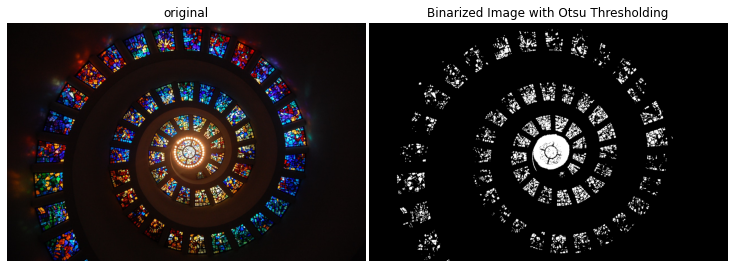

In [35]:
# We will use common thresholding algorithm threshold_otsu

from skimage.filters import threshold_otsu
threshold = threshold_otsu(spiral_gray)
# Binarize
binary_spiral = spiral_gray > threshold
compare(spiral, binary_spiral, 'Binarized Image with Otsu Thresholding')

### 3. Thresholding - local

Now, we will work with local thresholding algorithms.

Instead of looking at the whole image, local algorithms focus on pixel neighborhoods to account for the uneven brightness in different regions. A common local algorithm in skimage is given as threshold_local function:


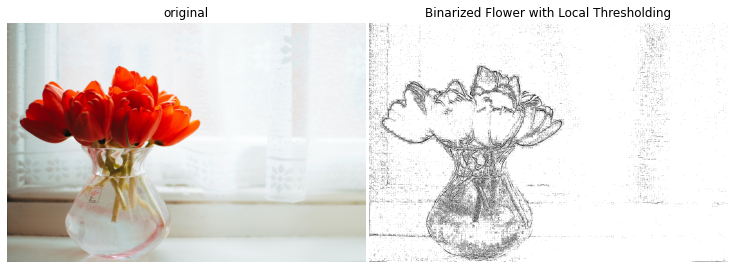

In [36]:
from skimage.filters import threshold_local

local_threshold = threshold_local(flower_gray, block_size=3, offset=0.0002)
# Binarize
binary_flower = flower_gray > local_threshold
# Compare
compare(flower, binary_flower, 'Binarized Flower with Local Thresholding')

You have to play around with the `offset` argument to find the optimal image to your needs. `offset` is the constant that is subtracted from the mean of the local pixel neighborhood. This "pixel neighborhood" is determined with the `block_size` parameter in `local_threshold`, which denotes the number of pixels the algorithm looks around each point in each direction.

Obviously, it is a disadvantage to tune both `offset` and `block_size` but local thresholding is the only option that yields better results than manual or global thresholding.

Let's try one more example:

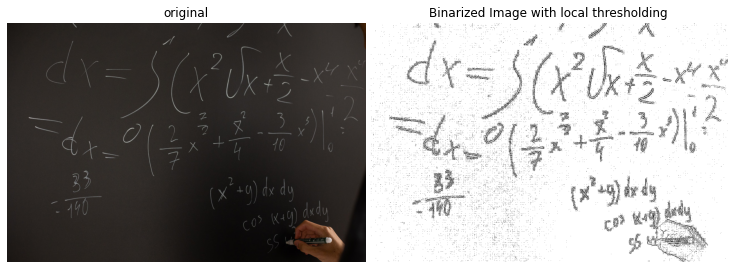

In [37]:
from skimage.filters import threshold_local

handwriting = imread('images/chalk_writing.jpg')
handwriting_gray = rgb2gray(handwriting)

# Find optimal threshold using local
local_threshold = threshold_local(handwriting_gray, block_size=3, offset=0.0003)

# Binarize
binary_handwriting = handwriting_gray > local_threshold
compare(handwriting, binary_handwriting, 'Binarized Image with local thresholding')

As you can see, the handwriting on the board is more refined after thresholding.

### 4. Edge Detection

Edge detection is useful in many ways, such as identifying objects, extracting features from them, counting them and many more. We will start with the basic Sobel filter, which finds edges of objects in gray scale images. We will load an image of coins and use the Sobel filter on them:

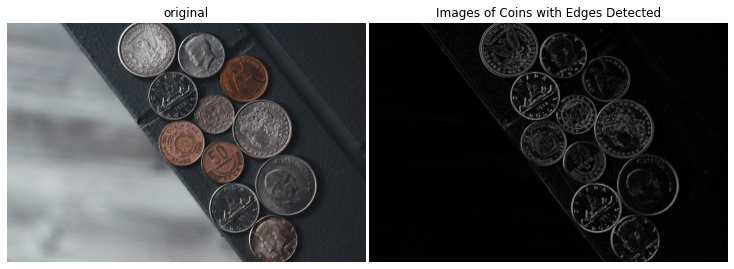

In [38]:
from skimage.filters import sobel

# load the image
coins = imread('images/coins_2.jpg')
coins_gray = rgb2gray(coins) # convert to grayscale

coins_edge = sobel(coins_gray)
# we will compare the image
compare(coins, coins_edge, 'Images of Coins with Edges Detected')

The Sobel is pretty straightforward, you just have to call it on the gray image to get an output like above. We will see a more sophisticated version of Sobel in a later section.

### 5. Smoothing

Another image filtering technique is smoothing. Many images like the chickens below, may contain random noise with no useful information to ML and DL algorithms.

For example, the hairs around the chickens add noise to the image, which may deviate the attention of ML models from the main objects themselves. In such scenarios, we use smoothing to blur the noise or edges and reduce contrast.


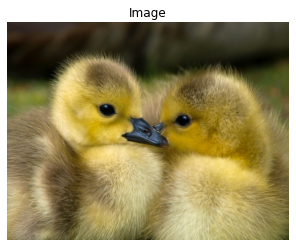

In [39]:
# Load the image
chickens = imread('images/chickens.jpg')
show(chickens)

One of the most popular and powerful smoothing techniques is gaussian smoothing:

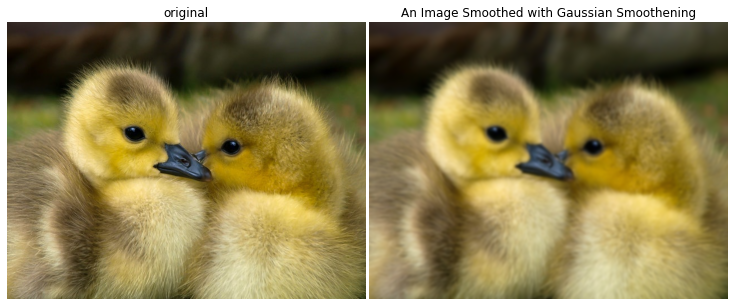

In [40]:
from skimage.filters import gaussian

# initialize gaussian and apply smoothening
smoothed = gaussian(chickens, multichannel=True, sigma=2)
# compare the images
compare(chickens, smoothed, 'An Image Smoothed with Gaussian Smoothening')

You can control the effect of the blur by tweaking the `sigma` argument. Don't forget to set `multichannel` to True if you are dealing with an RGB image.

If the image resolution is too high, the smoothing effect might not be visible to the naked eye but it will still be pronounced under the hood.

### 6. Contrast enhancement

Certain types of images like medical analysis results have low contrast, making it hard to spot details, like below:


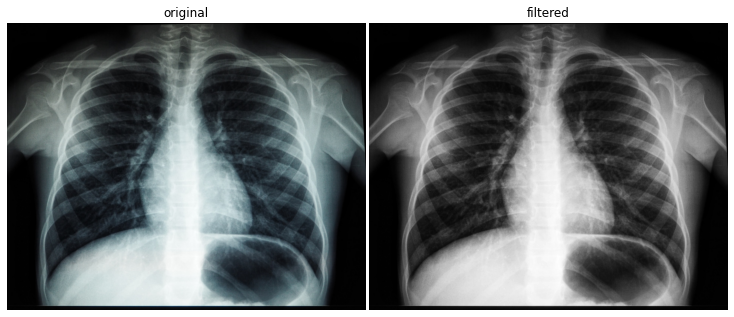

In [41]:
xray = imread('images/xray.jpg')
xray_gray = rgb2gray(xray)

# Compare the image
compare(xray, xray_gray)

In such scenarios, we can use contrast enhancement to make the details more distinct. There are two types of contrast enhancement algorithms:

    Contrast stretching
    Histogram equalization

We will discuss histogram equalization in this post, which, in turn, has three types:

    Standard histogram equalization
    Adaptive histogram equalization
    Contrast Limited Adaptive Histogram Equalization (CLAHE)

Histogram equalization spreads out the areas with the highest contrast of an image to less bright regions, equalizing it.

    Oh, by the way, you can calculate the contrast of an image by subtracting the lowest pixel value from the highest.

